In [1]:
library(tidyverse)
library(tidytext)
library(stringr)
library(knitr)
library(kableExtra)
library(wordcloud)
library(igraph)
library(tm)
library(topicmodels)
library(caret)
library(syuzhet)
library(ggraph)

library(text2vec)

library(data.table)
library(readr)
library(glmnet)


rm(list=ls())

fillColor = "#FFA07A"
fillColor2 = "#F1C40F"

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘purrr’ was built under R version 3.4.2”Warning message:
“package ‘dplyr’ was built under R version 3.4.2”Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
“package ‘tidytext’ was built under R version 3.4.4”Warning message:
“package ‘kableExtra’ was built under R version 3.4.4”Loading required package: RColorBrewer
Warning message:
“package ‘igraph’ was built under R version 3.4.4”
Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The foll

In [2]:
train = read_csv("train.csv")
test = read_csv("test.csv")

Parsed with column specification:
cols(
  id = col_character(),
  text = col_character(),
  author = col_character()
)
Parsed with column specification:
cols(
  id = col_character(),
  text = col_character()
)


## **Length of a Sentence**

In [3]:
train$len_of_sentence = str_count(train$text)
test$len_of_sentence = str_count(test$text)

## **Number of Words in a Sentence**

In [4]:
train$num_words = lengths(str_split(train$text, " "))
test$num_words = lengths(str_split(test$text, " "))

In [5]:
head(train)

id,text,author,len_of_sentence,num_words
id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP,231,41
id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL,71,14
id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP,200,36
id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS,206,34
id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL,174,27
id22965,"A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.",MWS,468,83


In [6]:
head(test)

id,text,len_of_sentence,num_words
id02310,"Still, as I urged our leaving Ireland with such inquietude and impatience, my father thought it best to yield.",110,19
id24541,"If a fire wanted fanning, it could readily be fanned with a newspaper, and as the government grew weaker, I have no doubt that leather and iron acquired durability in proportion, for, in a very short time, there was not a pair of bellows in all Rotterdam that ever stood in need of a stitch or required the assistance of a hammer.",330,62
id00134,"And when they had broken down the frail door they found only this: two cleanly picked human skeletons on the earthen floor, and a number of singular beetles crawling in the shadowy corners.",189,33
id27757,"While I was thinking how I should possibly manage without them, one actually tumbled out of my head, and, rolling down the steep side of the steeple, lodged in the rain gutter which ran along the eaves of the main building.",223,41
id04081,I am not sure to what limit his knowledge may extend.,53,11
id27337,"""The thick and peculiar mist, or smoke, which distinguishes the Indian Summer, and which now hung heavily over all objects, served, no doubt, to deepen the vague impressions which these objects created.",202,32


## **Authors with Longest Sentences**

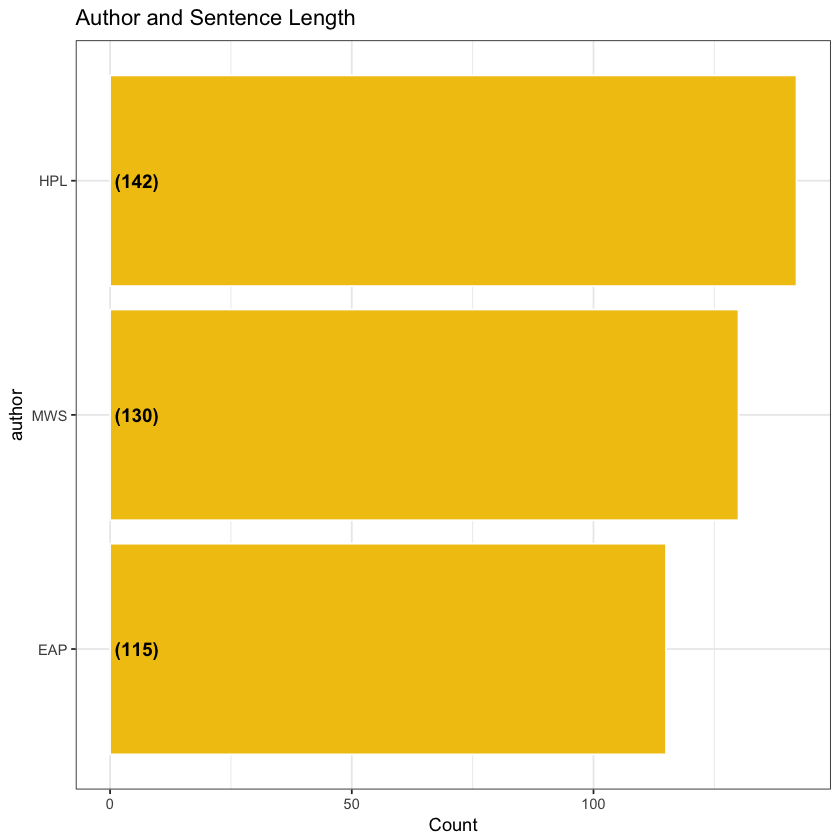

In [7]:
train %>%
group_by(author) %>%
summarise(
    CountMedian = median(len_of_sentence, na.rm = TRUE)
) %>%
ungroup() %>%
mutate(
    author = reorder(author, CountMedian)
) %>%
ggplot(aes(author, CountMedian))+
geom_bar(stat='identity',colour="white", fill = fillColor2) +
geom_text(aes(x = author, y = 1, label = paste0("(",CountMedian,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = 'black',
        fontface = 'bold') +
labs(x = 'author', 
   y = 'Count', 
   title = 'Author and Sentence Length') +
coord_flip() + 
theme_bw()

## **Authors and their Respective Word Counts**

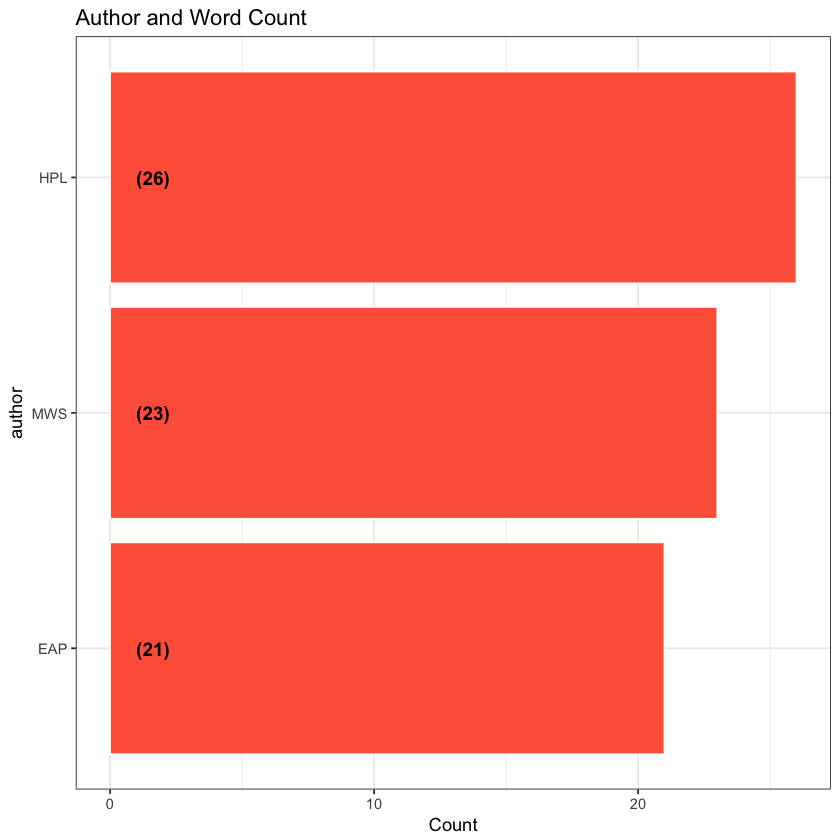

In [8]:
train %>%
group_by(author) %>%
summarise(
    CountMedian = median(num_words, na.rm = TRUE)
) %>%
ungroup() %>%
mutate(
    author = reorder(author, CountMedian)
) %>%
ggplot(aes(author, CountMedian))+
geom_bar(stat='identity',colour="white", fill = "tomato") +
geom_text(aes(x = author, y = 1, label = paste0("(",CountMedian,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = 'black',
        fontface = 'bold') +
labs(x = 'author', 
   y = 'Count', 
   title = 'Author and Word Count') +
coord_flip() + 
theme_bw()

## **Distribution of Word Length**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


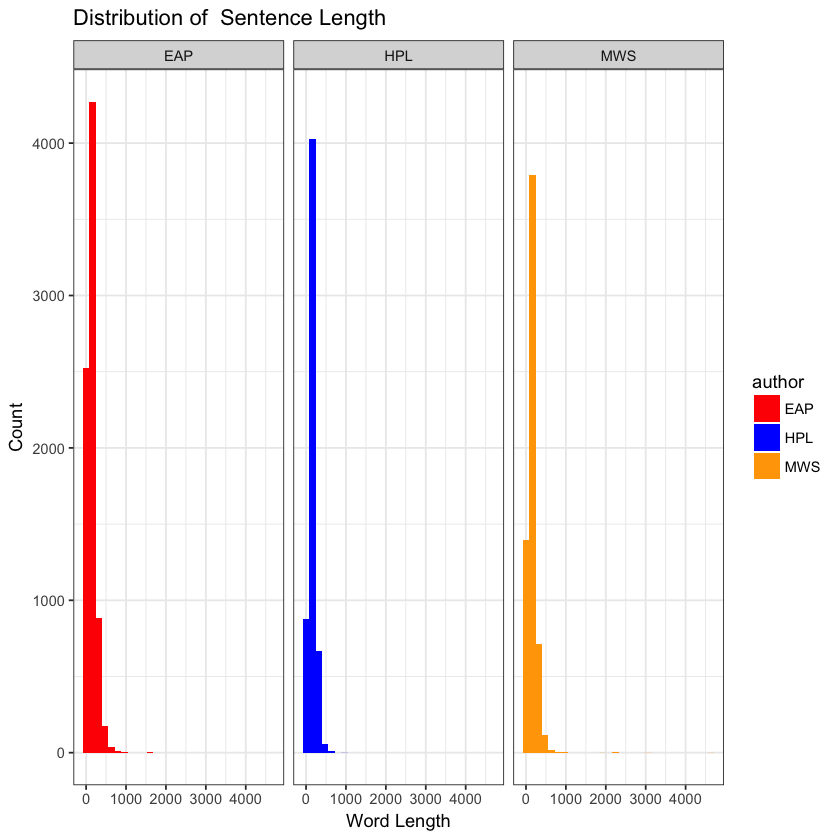

In [9]:
train %>%
ggplot(aes(x = len_of_sentence, fill = author))+
geom_histogram()+
scale_fill_manual( values = c("red","blue","orange") ) +
facet_wrap(~author) +
labs(x= 'Word Length',y = 'Count', title = paste("Distribution of", ' Sentence Length ')) +
theme_bw()

## **Tokenisation**

In [10]:
train %>%
unnest_tokens("words", text) %>%
head(10)

id,author,len_of_sentence,num_words,words
id26305,EAP,231,41,this
id26305,EAP,231,41,process
id26305,EAP,231,41,however
id26305,EAP,231,41,afforded
id26305,EAP,231,41,me
id26305,EAP,231,41,no
id26305,EAP,231,41,means
id26305,EAP,231,41,of
id26305,EAP,231,41,ascertaining
id26305,EAP,231,41,the


## **Removing Stop-Words**

In [11]:
train %>%
unnest_tokens(word, text) %>%
filter(!word %in% stop_words$word) %>%
head(10)

id,author,len_of_sentence,num_words,word
id26305,EAP,231,41,process
id26305,EAP,231,41,afforded
id26305,EAP,231,41,means
id26305,EAP,231,41,ascertaining
id26305,EAP,231,41,dimensions
id26305,EAP,231,41,dungeon
id26305,EAP,231,41,circuit
id26305,EAP,231,41,return
id26305,EAP,231,41,set
id26305,EAP,231,41,aware


## **Plotting top 10 Common Words**

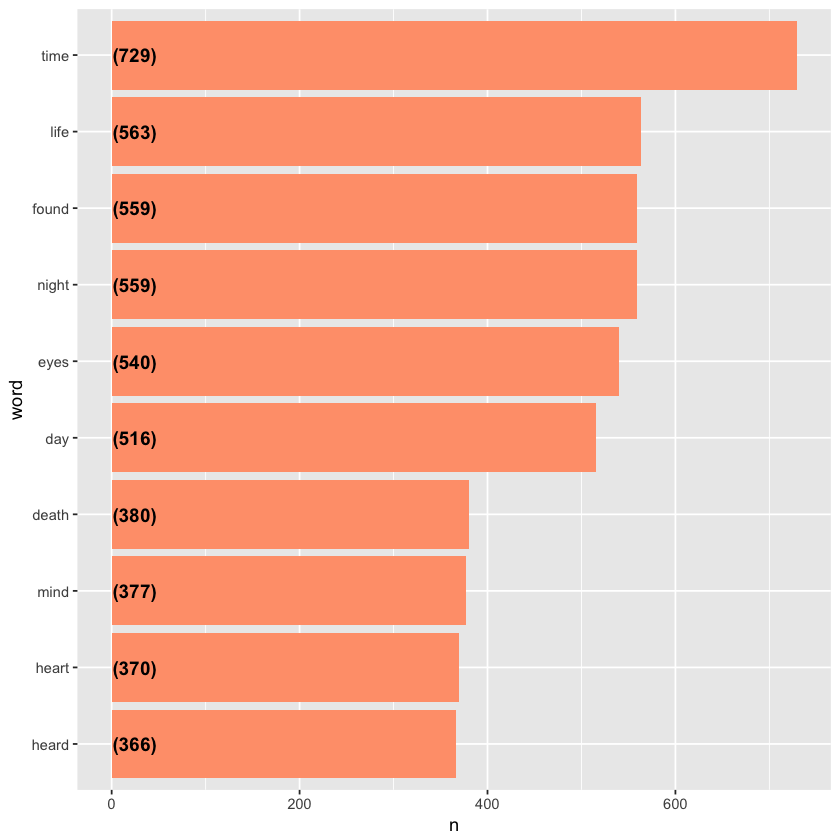

In [12]:
train %>%
unnest_tokens(word, text) %>%
filter(!word %in% stop_words$word) %>%
count(word, sort = TRUE) %>%
mutate(word = factor(word, levels = rev(unique(word)))) %>%
head(10) %>%
ggplot(aes(word, n))+
geom_bar(stat = "identity", fill = fillColor)+
geom_text(aes(x = word, y = 1, label = paste0("(",n,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = 'black',
        fontface = 'bold')+
coord_flip()

## **Wordcloud of Top Words**

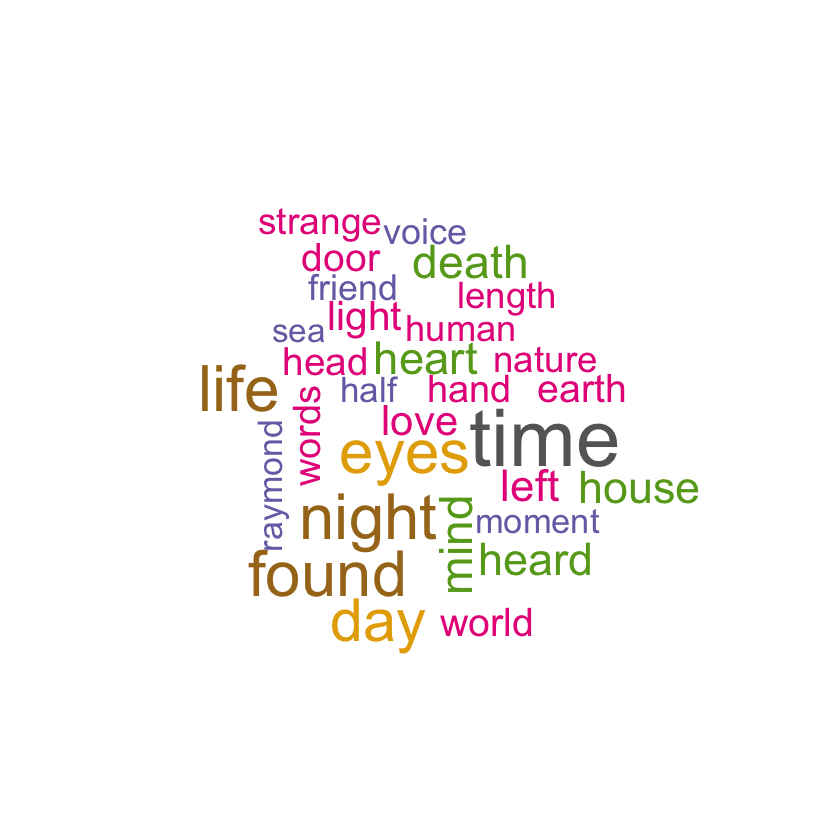

In [13]:
create_wordcloud <- function(train){
    train %>%
    unnest_tokens(word, text) %>%
    filter(!word %in% stop_words$word) %>%
    count(word, sort = TRUE) %>%
    ungroup() %>%
    head(30) %>%
    with(wordcloud(word, n, max.words = 30, colors=brewer.pal(8, "Dark2")))
}

create_wordcloud(train)

## **Wordcloud of HP Lovecraft**

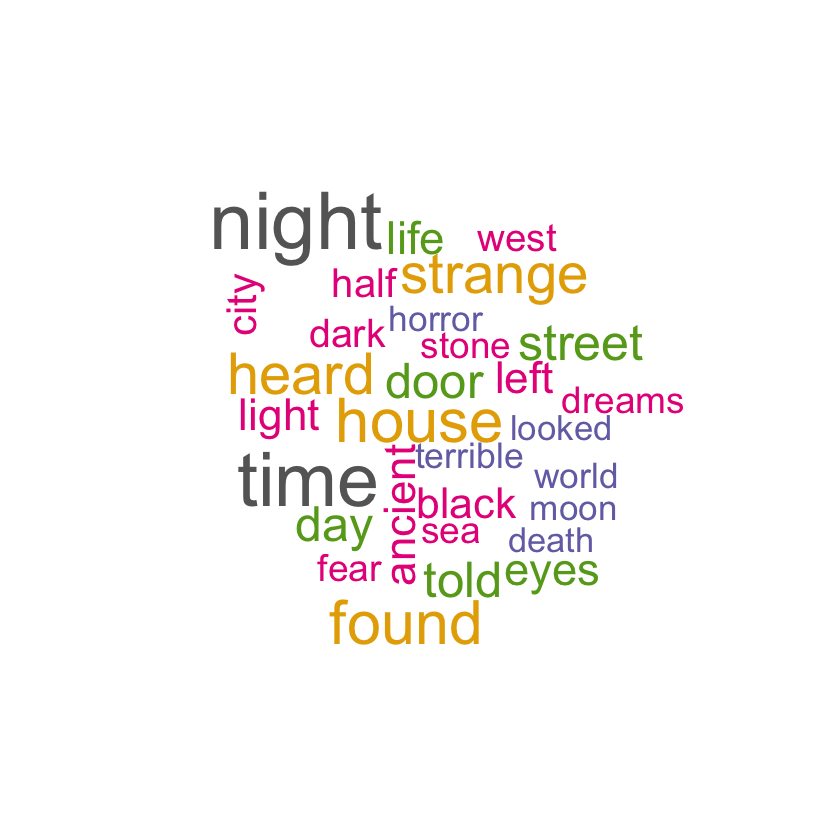

In [14]:
train_hpl <- train %>%
filter(author == "HPL")

create_wordcloud(train_hpl)

## **Wordcloud of Edgar Allan Poe**

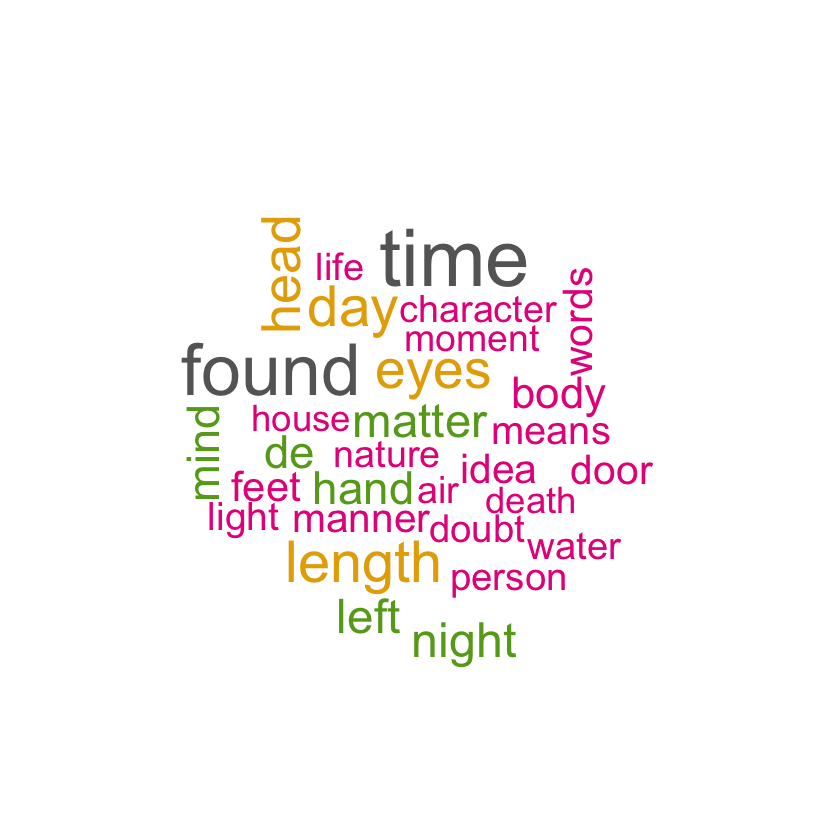

In [15]:
train_eap <- train %>%
filter(author == "EAP")

create_wordcloud(train_eap)

## **Wordcloud of Mary Wollstonecraft Shelley**

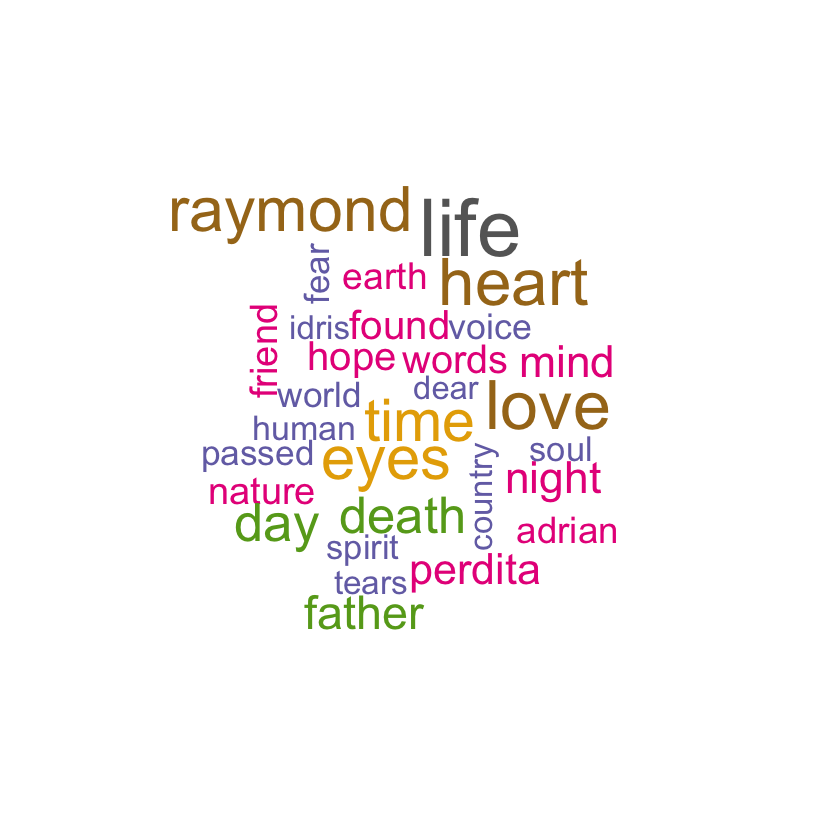

In [16]:
train_mws <- train %>%
filter(author == "MWS")

create_wordcloud(train_mws)

## **TF-IDF and 20 Most Important Words**

In [17]:
train_words <- train %>%
unnest_tokens(word, text) %>%
count(author, word, sort = TRUE) %>%
ungroup()

In [18]:
total_words <- train_words %>%
group_by(author) %>%
summarise(
    total_words = sum(n)
)

In [19]:
train_words <- left_join(train_words, total_words)
head(train_words, 10)

Joining, by = "author"


author,word,n,total_words
EAP,the,14993,200870
HPL,the,10933,156284
MWS,the,9659,165701
EAP,of,8972,200870
MWS,of,6137,165701
MWS,and,6123,165701
HPL,and,6098,156284
HPL,of,5846,156284
EAP,and,5735,200870
MWS,to,4829,165701


In [20]:
train_words_tfidf <- train_words %>%
filter(!is.na(author)) %>%
bind_tf_idf(word, author, n) %>%
arrange(desc(tf_idf))

In [21]:
head(train_words_tfidf, 20)

author,word,n,total_words,tf,idf,tf_idf
MWS,perdita,156,165701,0.0009414548,1.0986123,0.0010342938
MWS,adrian,126,165701,0.0007604058,1.0986123,0.0008353911
MWS,idris,109,165701,0.0006578114,1.0986123,0.0007226796
MWS,raymond,248,165701,0.0014966717,0.4054651,0.0006068482
MWS,windsor,73,165701,0.0004405526,1.0986123,0.0004839965
HPL,gilman,64,156284,0.0004095109,1.0986123,0.0004498937
HPL,innsmouth,59,156284,0.0003775179,1.0986123,0.0004147458
HPL,arkham,58,156284,0.0003711192,1.0986123,0.0004077162
EAP,dupin,57,200870,0.0002837656,1.0986123,0.0003117484
MWS,felix,44,165701,0.0002655385,1.0986123,0.0002917239


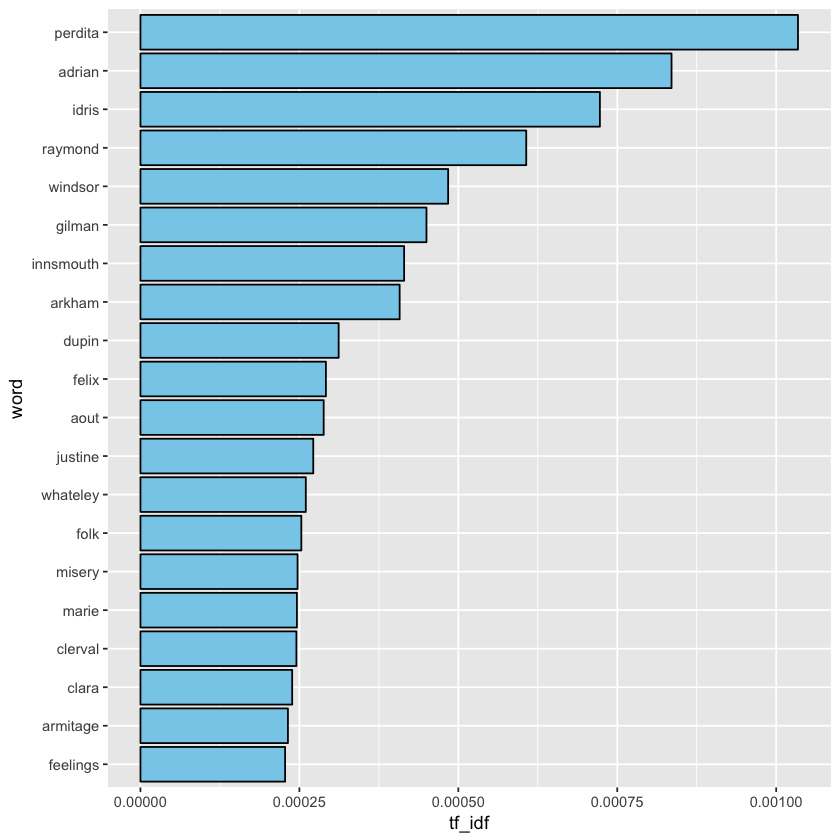

In [22]:
train_words_tfidf %>%
arrange(desc(tf_idf)) %>%
mutate(word = factor(word, levels = rev(unique(word)))) %>%
head(20) %>%
ggplot(aes(word, tf_idf))+
geom_bar(stat = "identity", fill = "skyblue", color = "black")+
coord_flip()

 ## **20 Most Important Words of HPL**

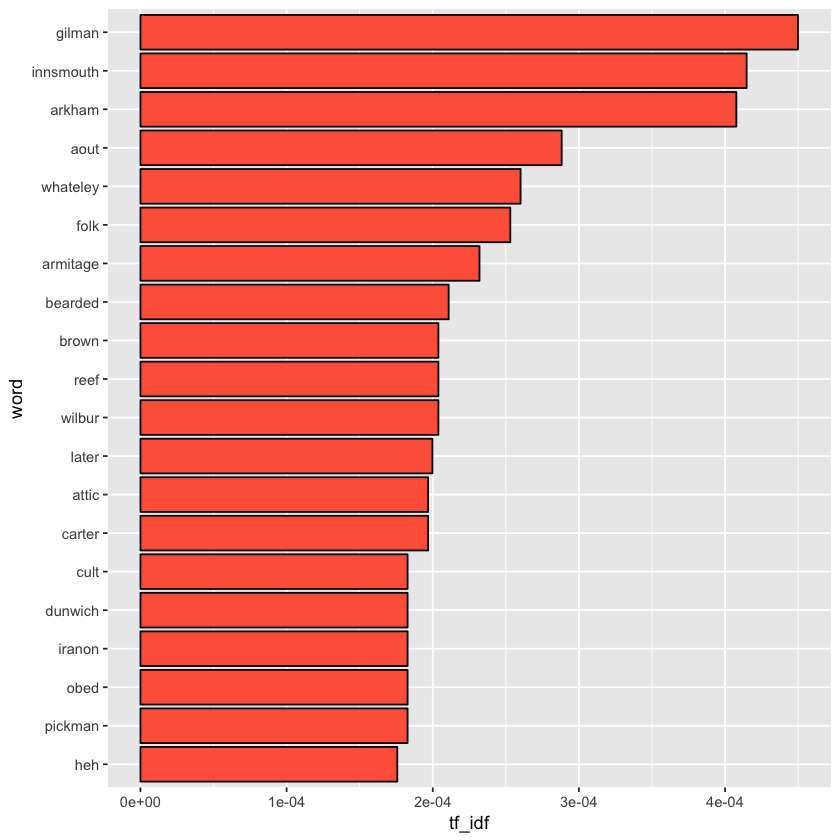

In [23]:
train_words_tfidf %>%
filter(author == "HPL") %>%
arrange(desc(tf_idf)) %>%
mutate(word = factor(word, levels = rev(unique(word)))) %>%
head(20) %>%
ggplot(aes(word, tf_idf))+
geom_bar(stat = "identity", fill = "tomato", color = "black")+
coord_flip()

## **20 Most Important Words of EAP**

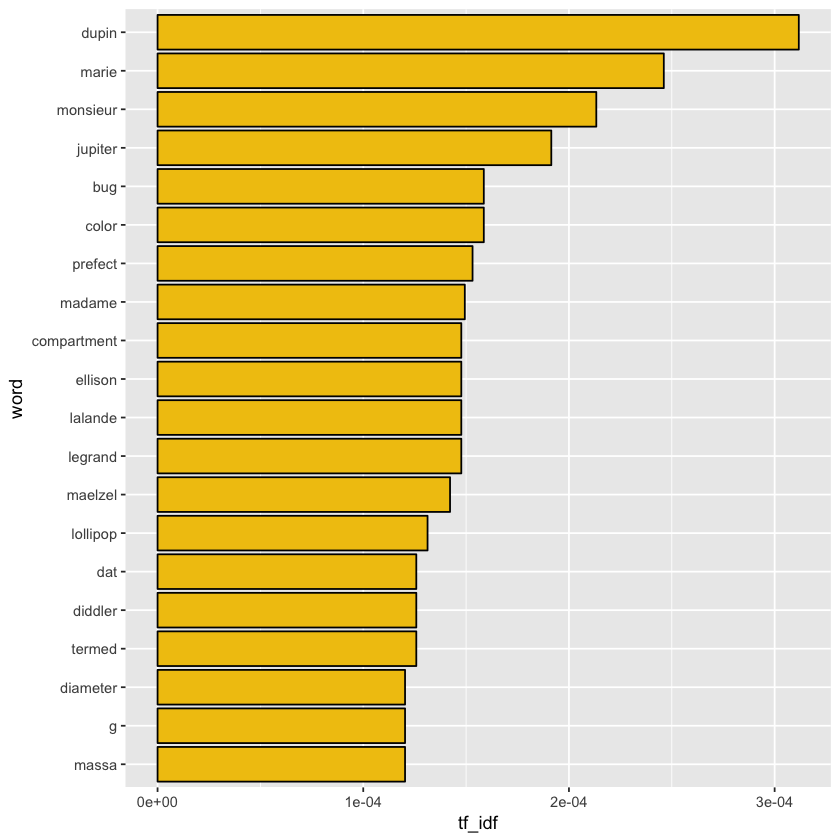

In [24]:
train_words_tfidf %>%
filter(author == "EAP") %>%
arrange(desc(tf_idf)) %>%
mutate(word = factor(word, levels = rev(unique(word)))) %>%
head(20) %>%
ggplot(aes(word, tf_idf))+
geom_bar(stat = "identity", fill = fillColor2, color = "black")+
coord_flip()

## **20 Most Important Words of MWS**

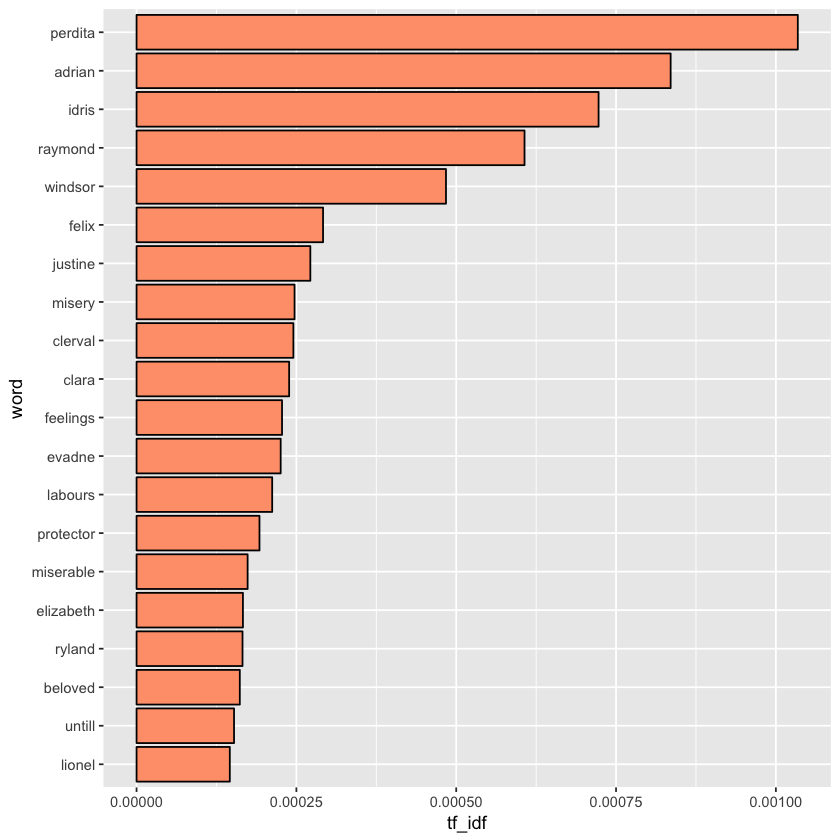

In [25]:
train_words_tfidf %>%
filter(author == "MWS") %>%
arrange(desc(tf_idf)) %>%
mutate(word = factor(word, levels = rev(unique(word)))) %>%
head(20) %>%
ggplot(aes(word, tf_idf))+
geom_bar(stat = "identity", fill = fillColor, color = "black")+
coord_flip()

## **Wordcloud for Most Important Words**

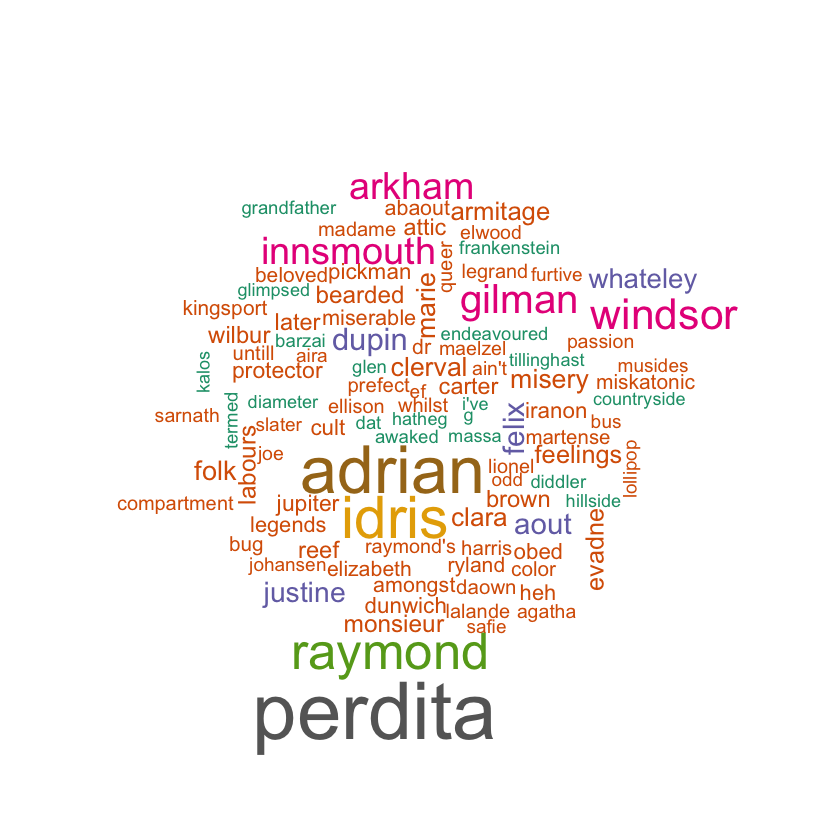

In [26]:
train_words_tfidf %>%
arrange(desc(tf_idf)) %>%
with(wordcloud(word, tf_idf, max.words = 100, colors = brewer.pal(8, "Dark2")))

## **Most Common Bigrams**

In [27]:
generate_bigrams <- function(dataset){
        dataset %>%
        unnest_tokens(bigram, text, token = "ngrams", n = 2)
}

count_bigrams <- function(dataset){
    dataset %>%
    unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
    separate(bigram, c("word1", "word2"), sep = " ") %>%
    filter(!word1 %in% stop_words$word,
          !word2 %in% stop_words$word) %>%
    count(word1, word2, sort = TRUE)
}

visualize_bigrams <- function(bigrams){
    set.seed(2016)
    a <- grid::arrow(type = "closed", length = unit(.15, "inches"))
  
    bigrams %>%
    graph_from_data_frame() %>%
    ggraph(layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a) +
    geom_node_point(color = "lightblue", size = 5) +
    geom_node_text(aes(label = name), vjust = 1, hjust = 1) +
    theme_void()
}

In [28]:
head(count_bigrams(train), 10)

word1,word2,n
lord,raymond,27
fellow,creatures,22
ha,ha,22
main,compartment,21
madame,lalande,20
chess,player,18
short,time,18
heh,heh,17
blue,eyes,16
left,arm,16


Selecting by n


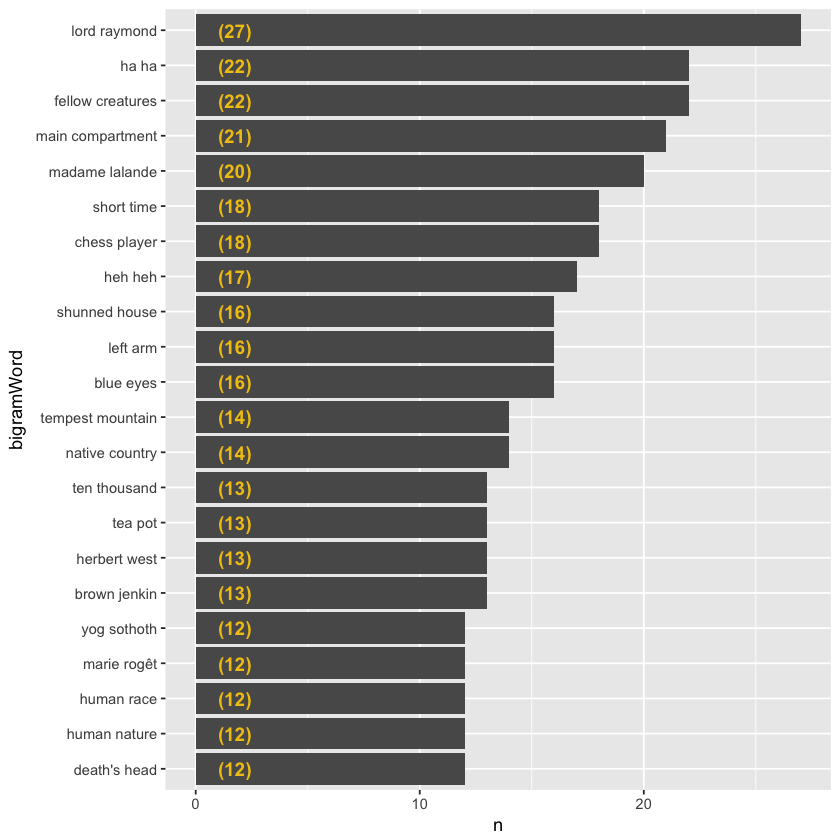

In [29]:
train %>%
unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
separate(bigram, c("word1", "word2"), sep = " ") %>%
filter(!word1 %in% stop_words$word,
       !word2 %in% stop_words$word) %>%
unite(bigramWord, word1, word2, sep = " ") %>%
count(bigramWord, sort = TRUE) %>%
arrange(desc(n)) %>%
mutate(bigramWord = reorder(bigramWord, n)) %>%
top_n(n = 20) %>%
ggplot(aes(bigramWord, n))+
geom_bar(stat = "identity")+
geom_text(aes(x = bigramWord, y = 1, label = paste0("(",n,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = fillColor2,
        fontface = 'bold')+
coord_flip()

## **Most Common Trigrams**

Selecting by n


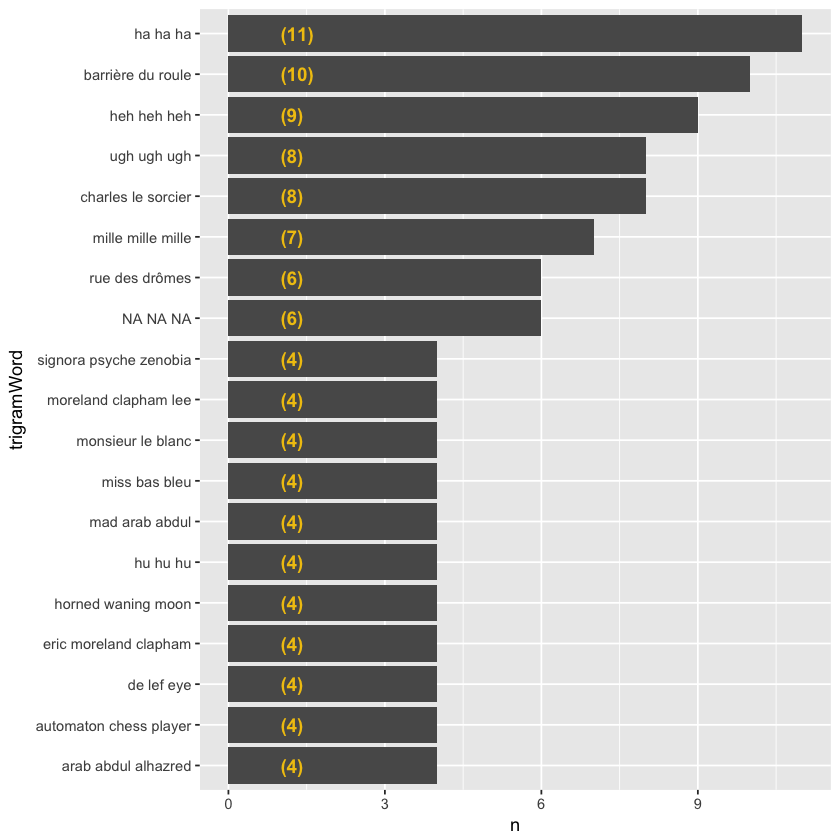

In [30]:
train %>%
unnest_tokens(trigram, text, token = "ngrams", n = 3) %>%
separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
filter(!word1 %in% stop_words$word,
       !word2 %in% stop_words$word,
       !word3 %in% stop_words$word) %>%
unite(trigramWord, word1, word2, word3, sep = " ") %>%
count(trigramWord, sort = TRUE) %>%
arrange(desc(n)) %>%
mutate(trigramWord = reorder(trigramWord, n)) %>%
top_n(n = 10) %>%
ggplot(aes(trigramWord, n))+
geom_bar(stat = "identity")+
geom_text(aes(x = trigramWord, y = 1, label = paste0("(",n,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = fillColor2,
        fontface = 'bold')+
coord_flip()

## **Visualizing Relationship Among Words**

In [31]:
train_words_2 <- train %>%
count_bigrams() %>%
filter(n > 10) %>%
visualize_bigrams()

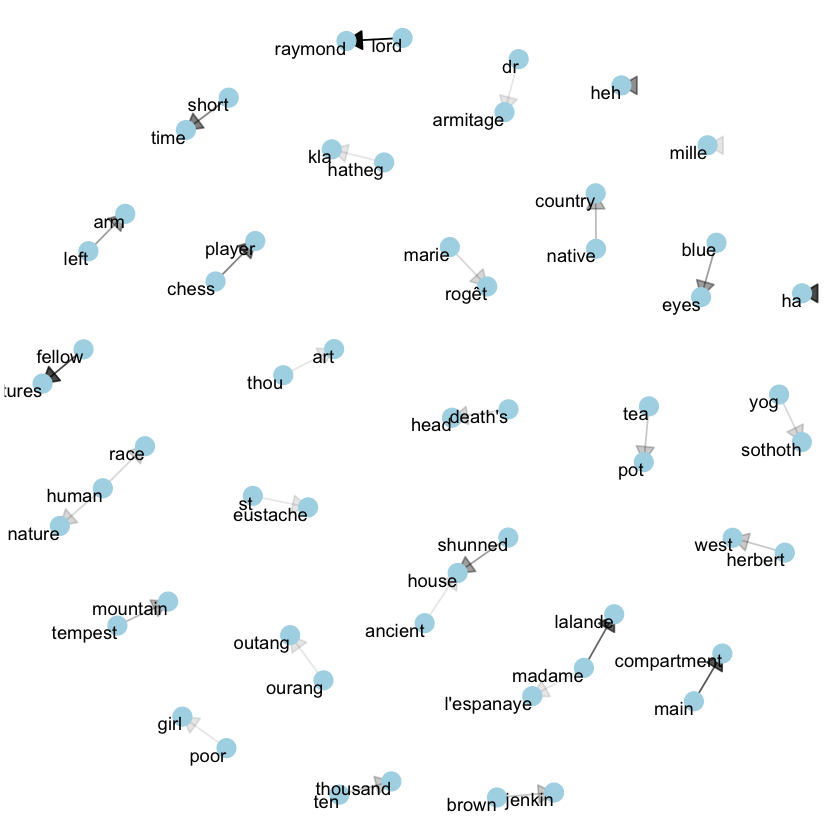

In [32]:
train_words_2

## **Sentiment Analysis**

### **Authors with positive and negative sentiments**

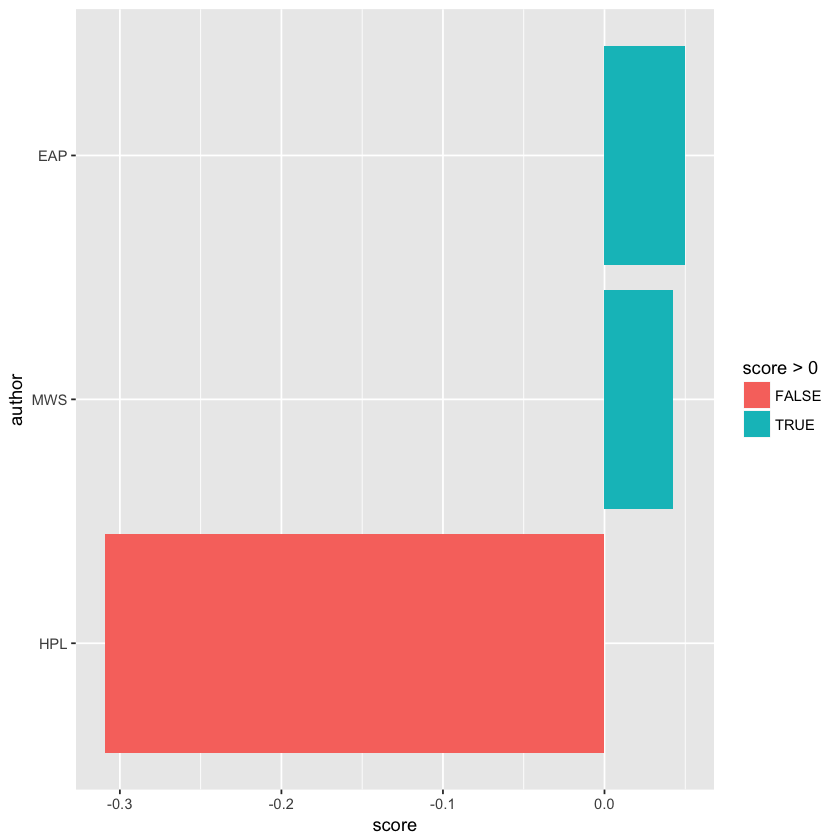

In [33]:
train %>%
unnest_tokens(word, text) %>%
count(author, word, sort = TRUE) %>%
inner_join(get_sentiments("afinn"), by = "word") %>%
group_by(author) %>%
summarise(score = sum(score*n)/sum(n)) %>%
arrange(desc(score)) %>%
mutate(author = reorder(author, score)) %>%
ggplot(aes(author, score, fill = score > 0))+
geom_col(show.legend = TRUE)+
coord_flip()

### **Top words with positve and negative sentiments**

In [34]:
plot_positive_and_negative_words <- function(df){
    df %>%
    unnest_tokens(word, text) %>%
    count(author, word, sort = TRUE) %>%
    ungroup() %>%
    inner_join(get_sentiments("afinn"), by = "word") %>%
    group_by(word) %>%
    summarise(
        contribution = sum(score),
        occurences = n()
    ) %>%
    top_n(20, abs(contribution)) %>%
    mutate(word = reorder(word, contribution)) %>%
    head(20) %>%
    ggplot(aes(word, contribution, fill = contribution > 0))+
    geom_col(show.legend = TRUE)+
    coord_flip()
}

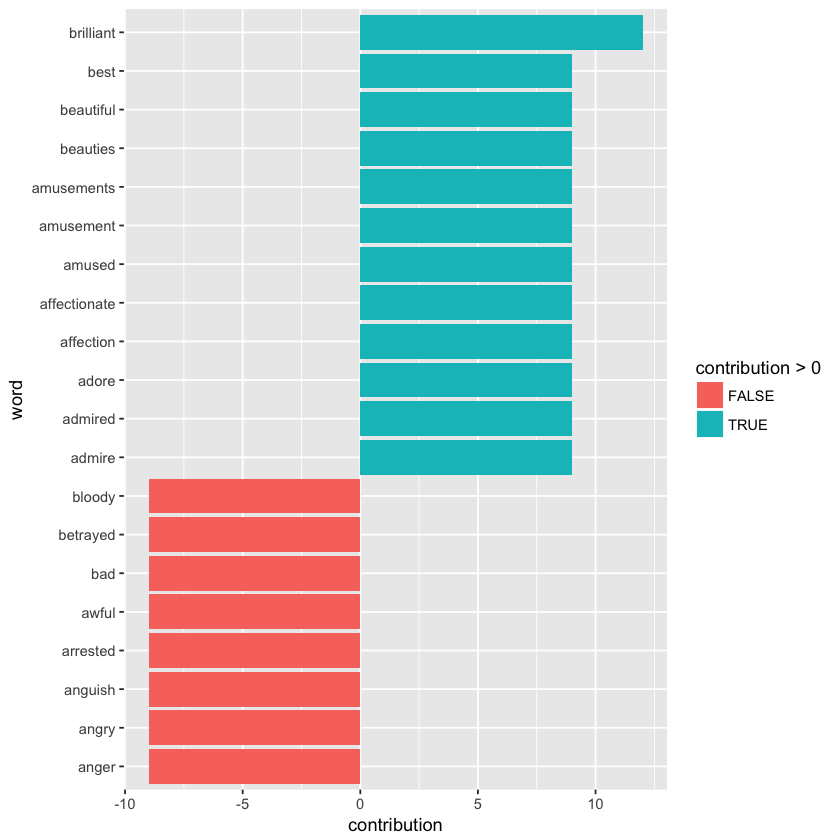

In [35]:
plot_positive_and_negative_words(train)

## **Positive and Negative Words of HPL**

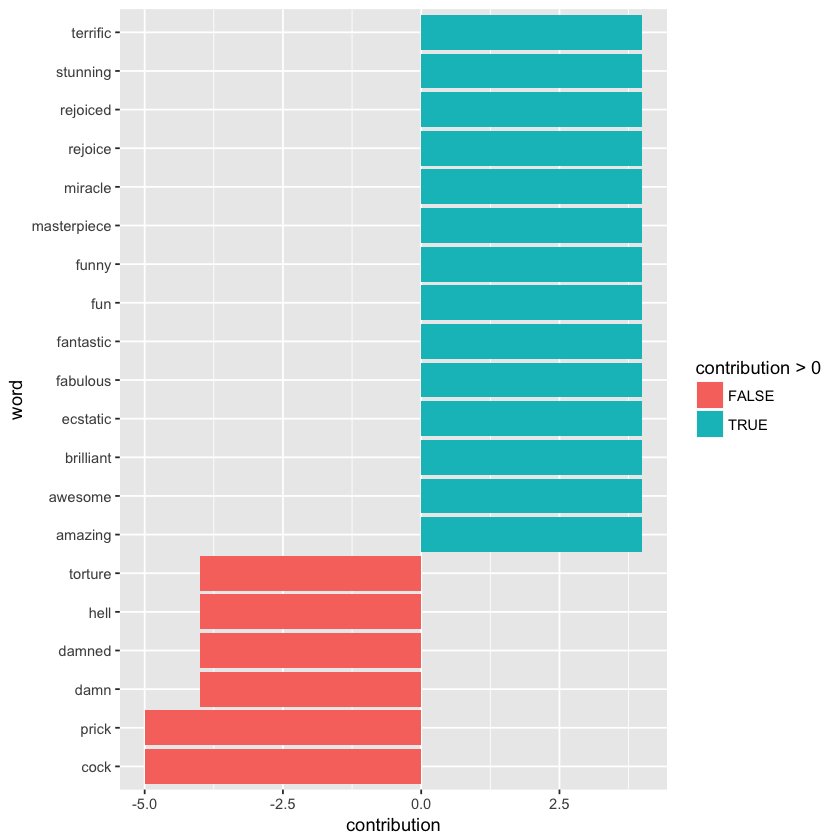

In [36]:
plot_positive_and_negative_words(train %>% filter(author == "HPL"))

## **Positive and Negative Words of EAP**

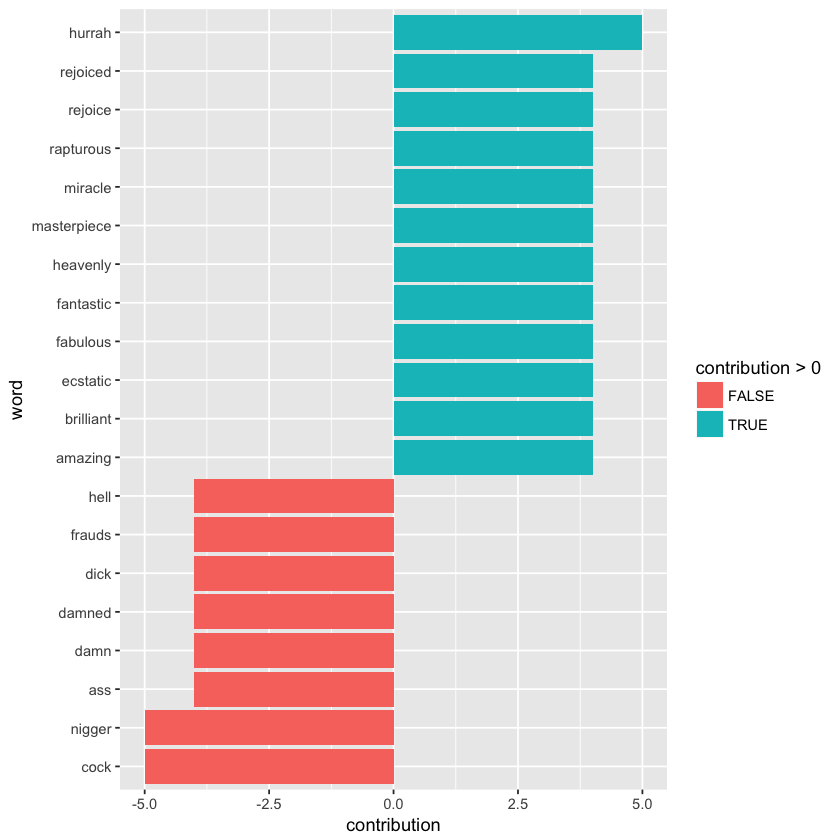

In [37]:
plot_positive_and_negative_words(train %>% filter(author == "EAP"))

## **Positive and Negative Words of MWS**

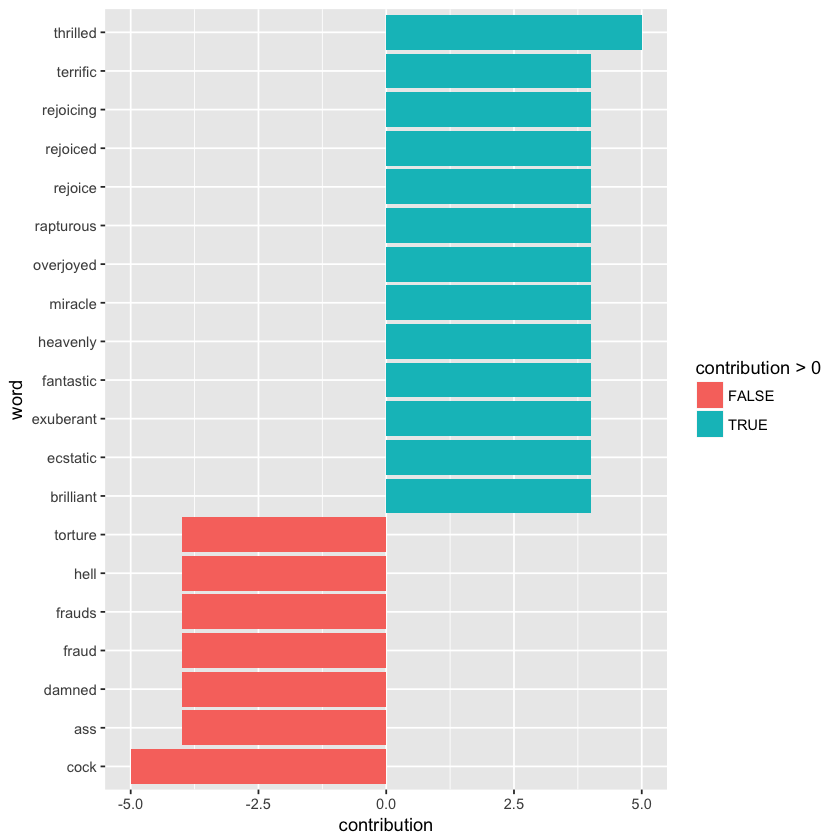

In [38]:
plot_positive_and_negative_words(train %>% filter(author == "MWS"))

## **Sentiment Analysis using NRC Sentiment**

In [39]:
plot_emotions <- function(emotion){
    nrc_emotions = get_sentiments("nrc") %>% filter(sentiment == emotion)
    
    train %>%
    unnest_tokens(word, text) %>%
    filter(!word %in% stop_words$word) %>%
    inner_join(nrc_emotions, by = "word") %>%
    group_by(author) %>%
    count(sentiment) %>%
    ungroup() %>%
    arrange(desc(n)) %>%
    mutate(author = reorder(author, n)) %>%
    ggplot(aes(author, n))+
    geom_col()+
    geom_text(aes(x = author, y = 1, label = paste0("(",n,")",sep="")),
        hjust=0, vjust=.5, size = 4, colour = fillColor2,
        fontface = 'bold')+
    coord_flip()
}

get_emotional_words <- function(emotion, author){
    nrc_emotions = get_sentiments("nrc") %>% filter(sentiment == emotion)
    
    train %>%
    unnest_tokens(word, text) %>%
    filter(!word %in% stop_words$word) %>%
    filter(author == author) %>%
    inner_join(nrc_emotions, by = "word") %>%
    group_by(word) %>%
    summarise(Count = n()) %>%
    arrange(desc(Count)) %>%
    with(wordcloud(word, Count, max.words = 30, colors = brewer.pal(8, "Dark2")))
}

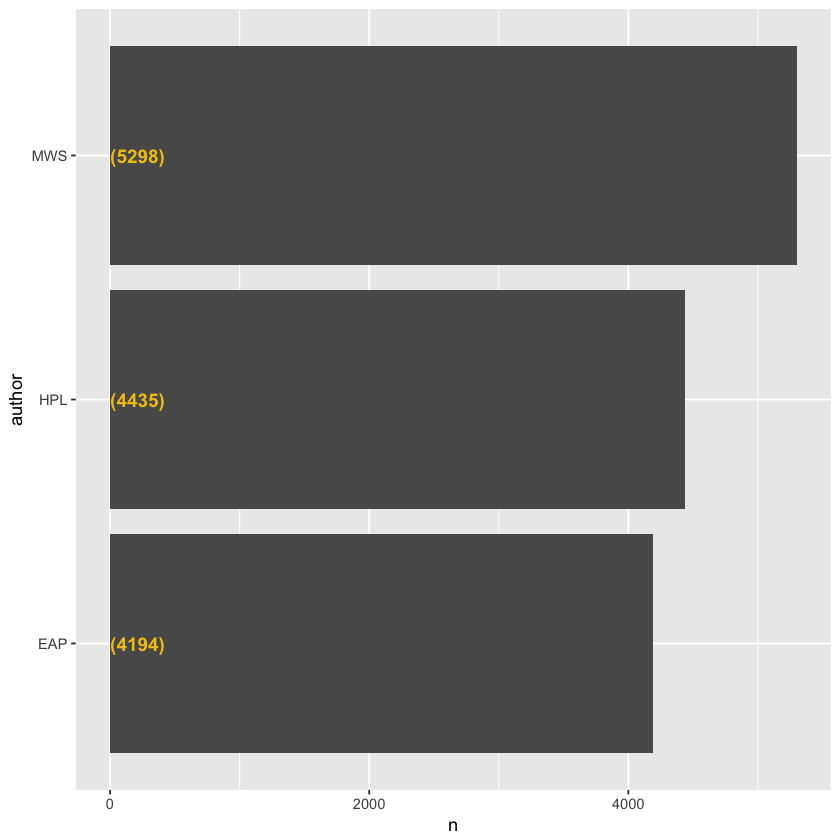

In [40]:
plot_emotions("fear")

## **Fear Wordcloud of MWS**

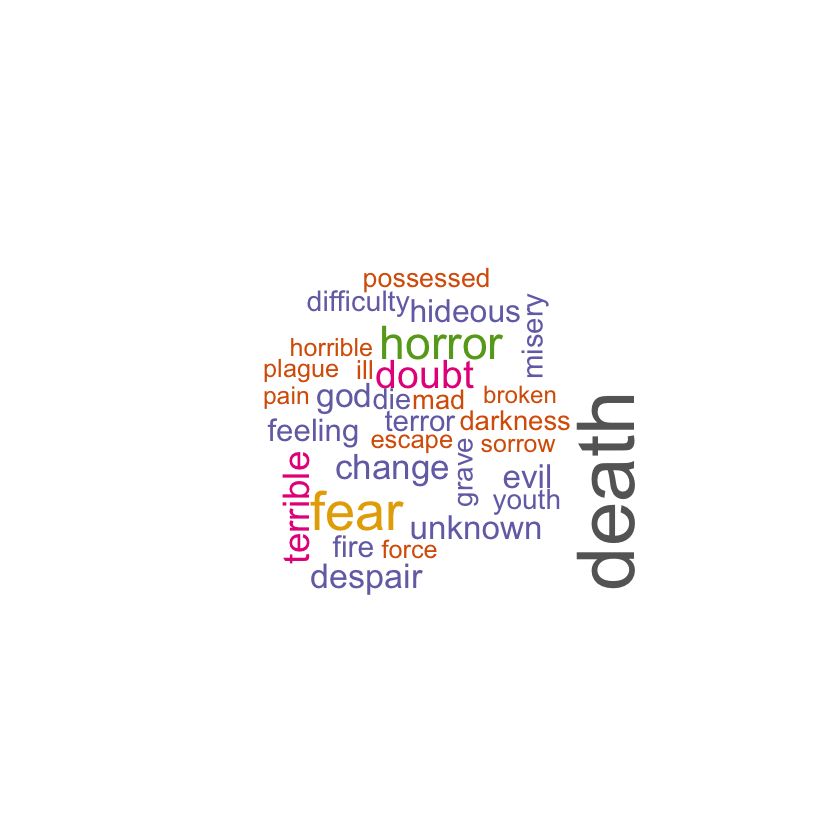

In [41]:
get_emotional_words("fear", "MWS")

## **Most Surprising Author**

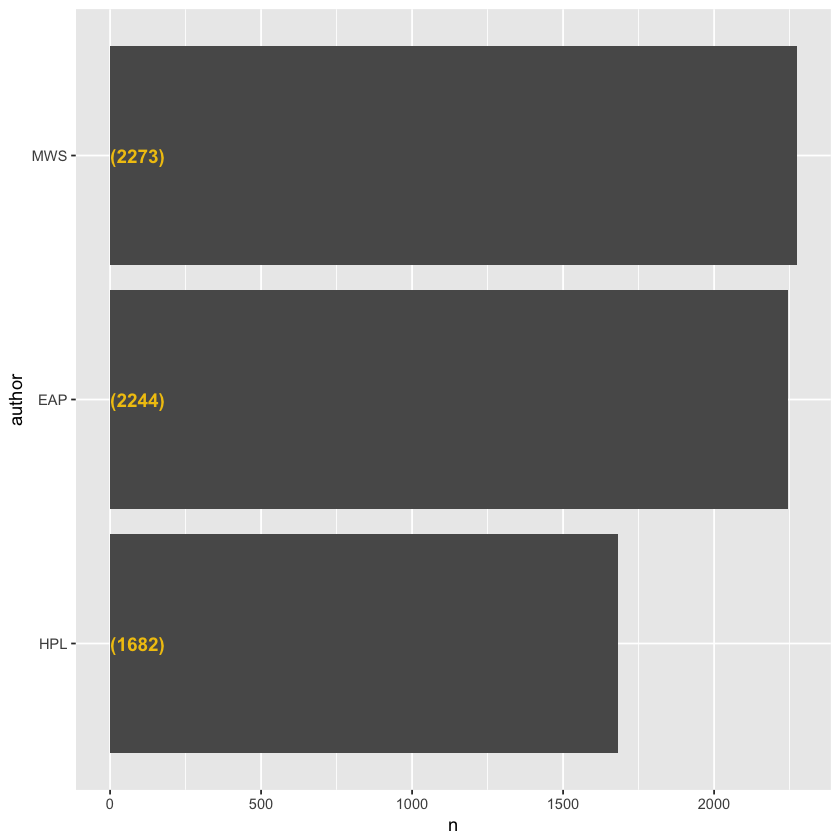

In [42]:
plot_emotions("surprise")

## **Wordcloud of Surprising Words for MWS**

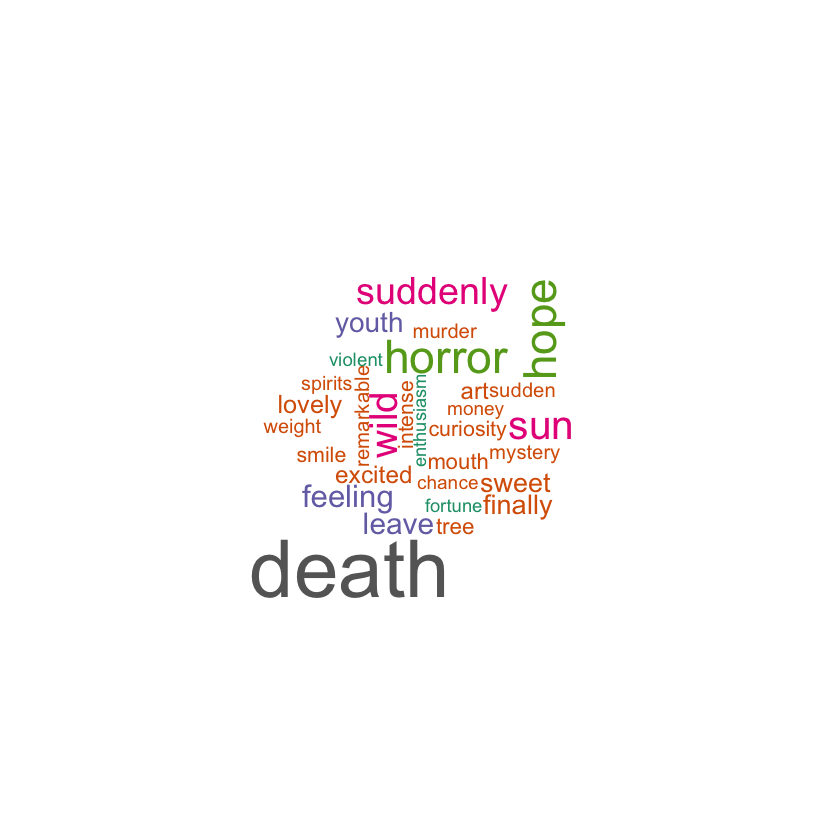

In [43]:
get_emotional_words("surprise", "MWS")

## **Most Joyful Author**

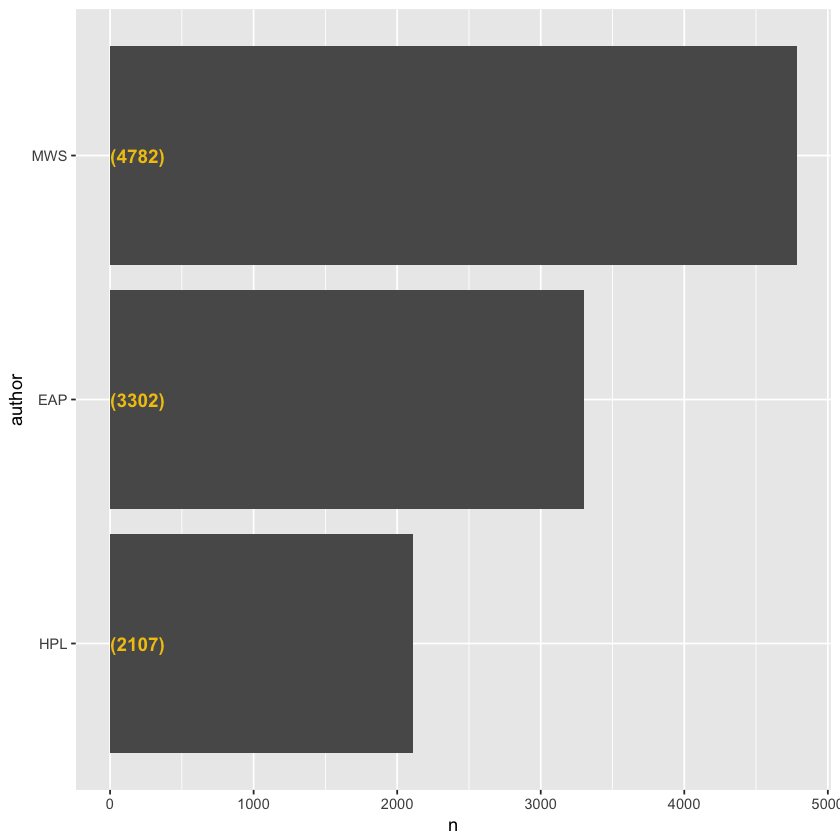

In [44]:
plot_emotions("joy")

## **Wordcloud of the most Joyful Author**

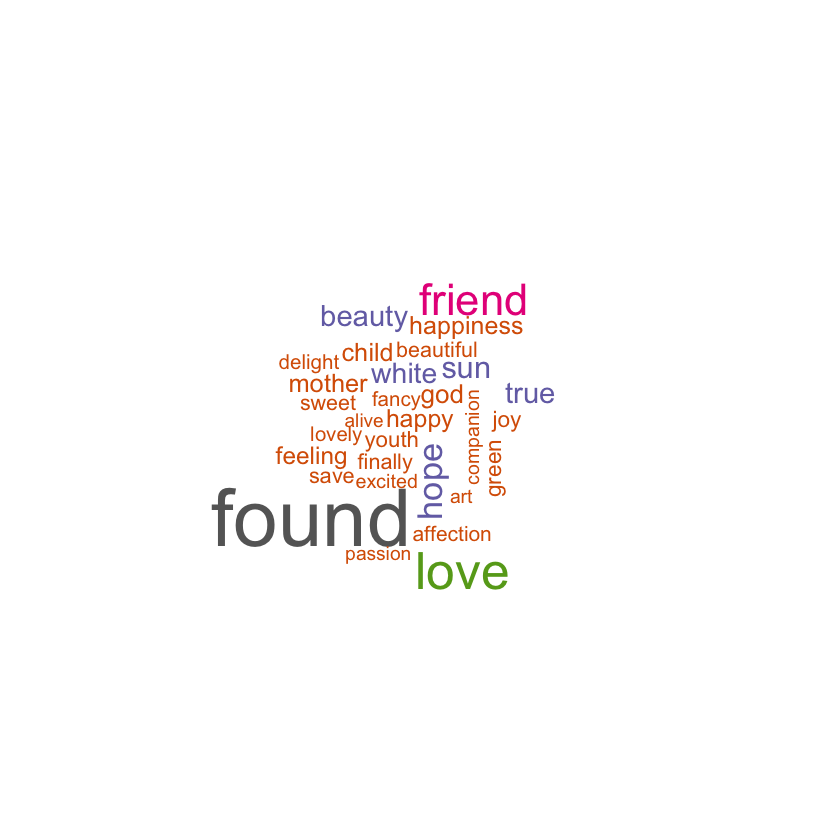

In [45]:
get_emotional_words("joy", "MWS")

## **Positive and Negative Lines**

In [46]:
train %>%
unnest_tokens(word, text) %>%
inner_join(get_sentiments("afinn"), by = "word") %>%
group_by(id) %>%
summarise(line_sentiment = mean(score)) %>%
arrange(desc(line_sentiment)) %>%
right_join(train, by = "id")

id,line_sentiment,text,author,len_of_sentence,num_words
id26305,1.0000000,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP,231,41
id17569,-2.0000000,It never once occurred to me that the fumbling might be a mere mistake.,HPL,71,14
id11008,2.0000000,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP,200,36
id27763,2.5000000,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS,206,34
id12958,-2.0000000,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL,174,27
id22965,2.0000000,"A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so refined the groundwork of my character that I cannot overcome an intense distaste to the usual brutality exercised on board ship: I have never believed it to be necessary, and when I heard of a mariner equally noted for his kindliness of heart and the respect and obedience paid to him by his crew, I felt myself peculiarly fortunate in being able to secure his services.",MWS,468,83
id09674,NA,"The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.",EAP,128,21
id13515,NA,The surcingle hung in ribands from my body.,EAP,43,8
id19322,0.5000000,"I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting your eyes upward to the great nebula in Orion, and I certainly expected that you would do so.",EAP,488,88
id00912,2.0000000,"I confess that neither the structure of languages, nor the code of governments, nor the politics of various states possessed attractions for me.",MWS,144,23


In [47]:
get_line_sentiment_scores <- function(df){
    sentiment_lines = df %>%
    unnest_tokens(word, text) %>%
    inner_join(get_sentiments("afinn"), by = "word") %>%
    group_by(id) %>%
    summarise(line_sentiment = mean(score)) %>%
    ungroup() %>%
    arrange(desc(line_sentiment)) %>%
    right_join(train, by = "id") %>%
    mutate(line_sentiment = ifelse(is.na(line_sentiment), 0, line_sentiment))
    
    return(sentiment_lines$line_sentiment)
}

## **Gender Analysis**

In [58]:
train %>%
unnest_tokens(bigram, text, token = "ngrams", n = 2) %>%
separate(bigram, c("word1", "word2"), sep = " ") %>%
filter(word1 %in% c("he", "she")) %>%
count(word1, word2) %>%
spread(word1, n, fill = 0) %>%
mutate(
    total = he + she,
    he = (he + 1)/sum(he + 1),
    she = (she + 1)/sum(she + 1),
    log_ratio = log2(she/he),
    abs_ratio = abs(log_ratio)
) %>%
arrange(desc(log_ratio)) %>%
filter(!word2 %in% c("himself", "herself"),
       !word2 %in% stop_words$word,
       total>= 20)

word2,he,she,total,log_ratio,abs_ratio
continued,0.003432701,0.005383023,30,0.64907233,0.64907233
cried,0.003071364,0.004554865,26,0.56852891,0.56852891
looked,0.004697380,0.006211180,39,0.40301101,0.40301101
died,0.002890696,0.003726708,23,0.36648513,0.36648513
loved,0.002710027,0.003312629,21,0.28966953,0.28966953
appeared,0.003432701,0.004140787,27,0.27056071,0.27056071
replied,0.003071364,0.003312629,23,0.10909729,0.10909729
heard,0.004336043,0.004554865,33,0.07102925,0.07102925
told,0.003071364,0.002898551,22,-0.08354779,0.08354779
spoke,0.007046070,0.004554865,48,-0.62941047,0.62941047
